In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

In [2]:
# read in data
df = pd.read_csv('../Data/cardio_train.csv', delimiter=';')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [3]:
print("Before removing outliers:")
df.describe()

Before removing outliers:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Remove outliers
# https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles

featuresToClean = ['height', 'weight', 'ap_hi', 'ap_lo']

q1 = df[featuresToClean].quantile(0.10)
q3 = df[featuresToClean].quantile(0.90)
interQuartileRange = q3 - q1

df = df[~((df[featuresToClean] < (q1 - 1.5*interQuartileRange)) | (df[featuresToClean] > (q3 + 1.5*interQuartileRange))).any(axis=1)]


In [7]:
print("After removing outliers:")
df.describe()

After removing outliers:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000,68504.000000
mean,49976.088550,19464.433916,1.348403,164.429055,74.011764,126.556624,81.279341,1.364169,1.225520,0.087995,0.053384,0.803340,0.494146
std,28842.024902,2468.318169,0.476468,7.847036,14.033643,16.541832,9.358512,0.678563,0.571462,0.283289,0.224799,0.397476,0.499969
min,0.000000,10798.000000,1.000000,125.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25007.750000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50014.500000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74863.250000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.000000,145.000000,210.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.to_csv("../Data/cardio_train.csv")

In [9]:
print(df.shape)

(68504, 13)


In [10]:
df_feat = df.iloc[:,1:-1] # eventhing but last column
target = df.iloc[:,-1] #last column

df_feat.head() # age in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feat)
scaled_features.shape # np array
print(scaled_features)

# citation: https://realpython.com/k-means-clustering-python/

[[-0.43407764  1.36756691  0.45507255 ... -0.31062043 -0.2374748
   0.49477573]
 [ 0.30934896 -0.73122565 -1.07417839 ... -0.31062043 -0.2374748
   0.49477573]
 [-0.24609402 -0.73122565  0.07275982 ... -0.31062043 -0.2374748
  -2.02111773]
 ...
 [-0.16142037  1.36756691  2.36663623 ... -0.31062043  4.21097307
  -2.02111773]
 [ 1.20186602 -0.73122565 -0.18211534 ... -0.31062043 -0.2374748
  -2.02111773]
 [ 0.43575174 -0.73122565  0.70994771 ... -0.31062043 -0.2374748
   0.49477573]]


In [12]:
max_clusters = 20

centers = [] # store centers
errors = [] # SSE

# store errors

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

for i in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)  
    kmeans.fit(scaled_features)
    centers.append(kmeans.cluster_centers_) # centers
    errors.append(kmeans.inertia_) # errors
    #print(kmeans.inertia_)

 

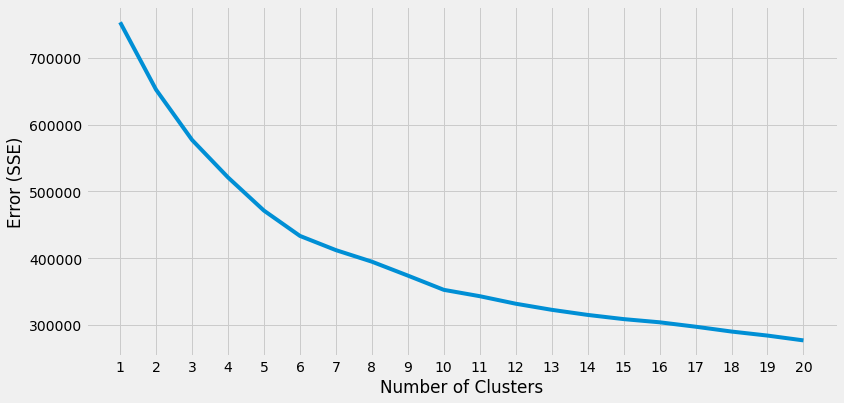

In [13]:
# plot results (N on error)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters+1), errors)
plt.xticks(range(1, max_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Error (SSE)")
plt.show()

In [14]:
from kneed import KneeLocator
# find optimal number of clusters
kl = KneeLocator(
    range(1, max_clusters+1), errors, curve="convex", direction="decreasing"
)

opt_n = kl.elbow
print(opt_n)

6


In [15]:
# for optimal number of clusters opt_n = 6
kmeans = KMeans(
    init="random",
    n_clusters=opt_n,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
error = kmeans.inertia_
labels = kmeans.labels_[:] # get labels # (70000,)
# sum counts 1 to opt_n --> size of clusters

In [16]:
df['label'] = labels
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,label
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,3
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,3


In [42]:
csv_name = "group" + str(i)

cluster_dfs = []

for i in range(opt_n):
    dfx = df[df['label'] == i]
    dfx = dfx.drop(labels = "label", axis = 1)
    print(dfx.head())
    
    cluster_dfs.append(dfx)
    
# Sort clusters by cardio var
cluster_dfs = sorted(cluster_dfs, key=cmp_to_key(lambda df1, df2: df1['cardio'].mean() - df2['cardio'].mean()), reverse=True)

for i in range(len(cluster_dfs)):
    csv_name = "../Data/CLUSTER" + str(i)
    cluster_dfs[i].to_csv(csv_name)

    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1    1  20228       1     156    85.0    140     90            3     1      0   
3    3  17623       2     169    82.0    150    100            1     1      0   
6    9  22113       1     157    93.0    130     80            3     1      0   
22  32  23046       1     158    90.0    145     85            2     2      0   
24  35  16608       1     170    68.0    150     90            3     1      0   

    alco  active  cardio  
1      0       1       1  
3      0       1       1  
6      0       1       0  
22     0       1       1  
24     0       1       1  
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
19  29  21755       2     162    56.0    120     70            1     1      1   
38  52  23388       2     162    72.0    130     80            1     1      1   
58  73  15901       2     172    84.0    140     90            1     1      1   
59  74  20431       1     1

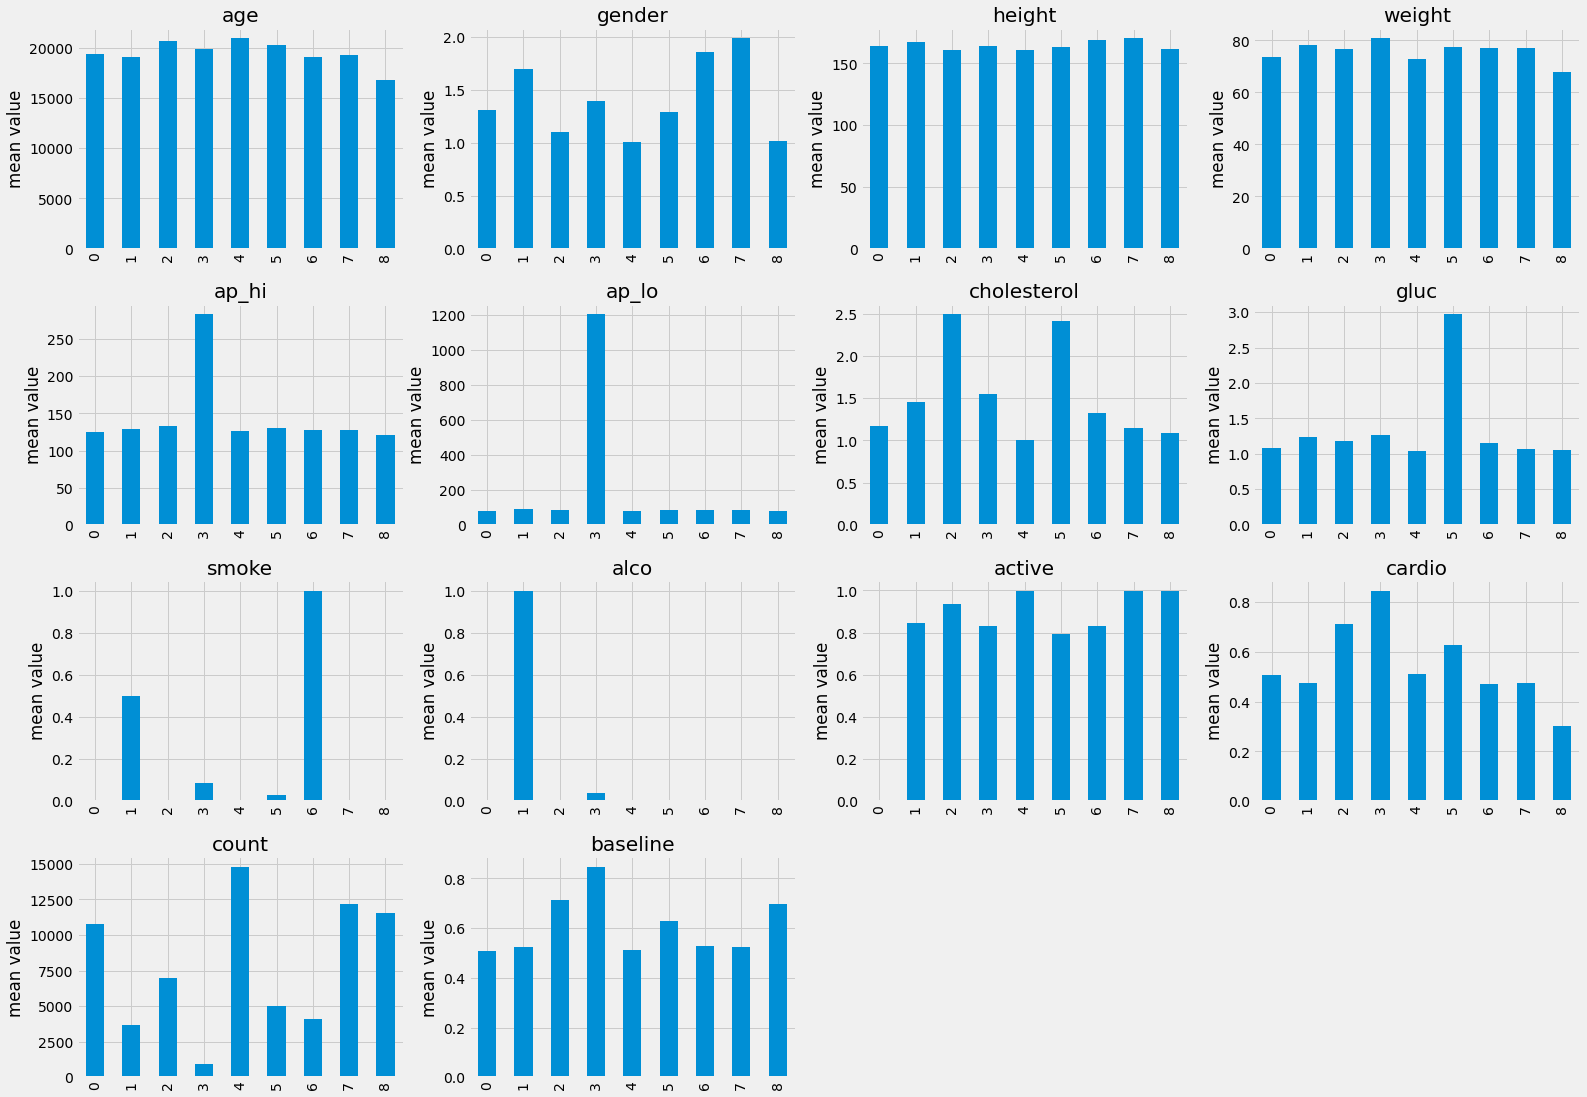

In [13]:
## cluster files
df_infos = []
for i in range(9): # 9 clusters
    path = 'CLUSTER'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df_info = df.mean().append(pd.Series({"count":len(df)}))
    df_infos.append(df_info[2:]) # id averages are meaningless
#     print(i, df.mean(), len(df), sep="\n")
cluster_summaries = pd.concat(df_infos, axis=1).T
cluster_summaries["baseline"] = pd.concat([cluster_summaries["cardio"], 1-cluster_summaries["cardio"]],axis=1).max(axis=1)

n,m = cluster_summaries.shape

import math
p = math.ceil(math.sqrt(m))
fig, axes = plt.subplots(nrows=p, ncols=p,figsize=(24,18))

plt.subplots_adjust(wspace=0.2, hspace=0.25)

(i,j) = 0,0
for col in cluster_summaries.columns:
    cluster_summaries[col].plot.bar(ax=axes[j//p, j%p])
    axes[j//p, j%p].set_title(col)
    axes[j//p, j%p].set_ylabel("mean value")
#     axes[j//p, j%p].savefig(col)
    j += 1
    
for r in range(j,p**2): # remove extra axis
    axes[r//p, r%p].set_axis_off()

plt.savefig("CLUSTER_sums")

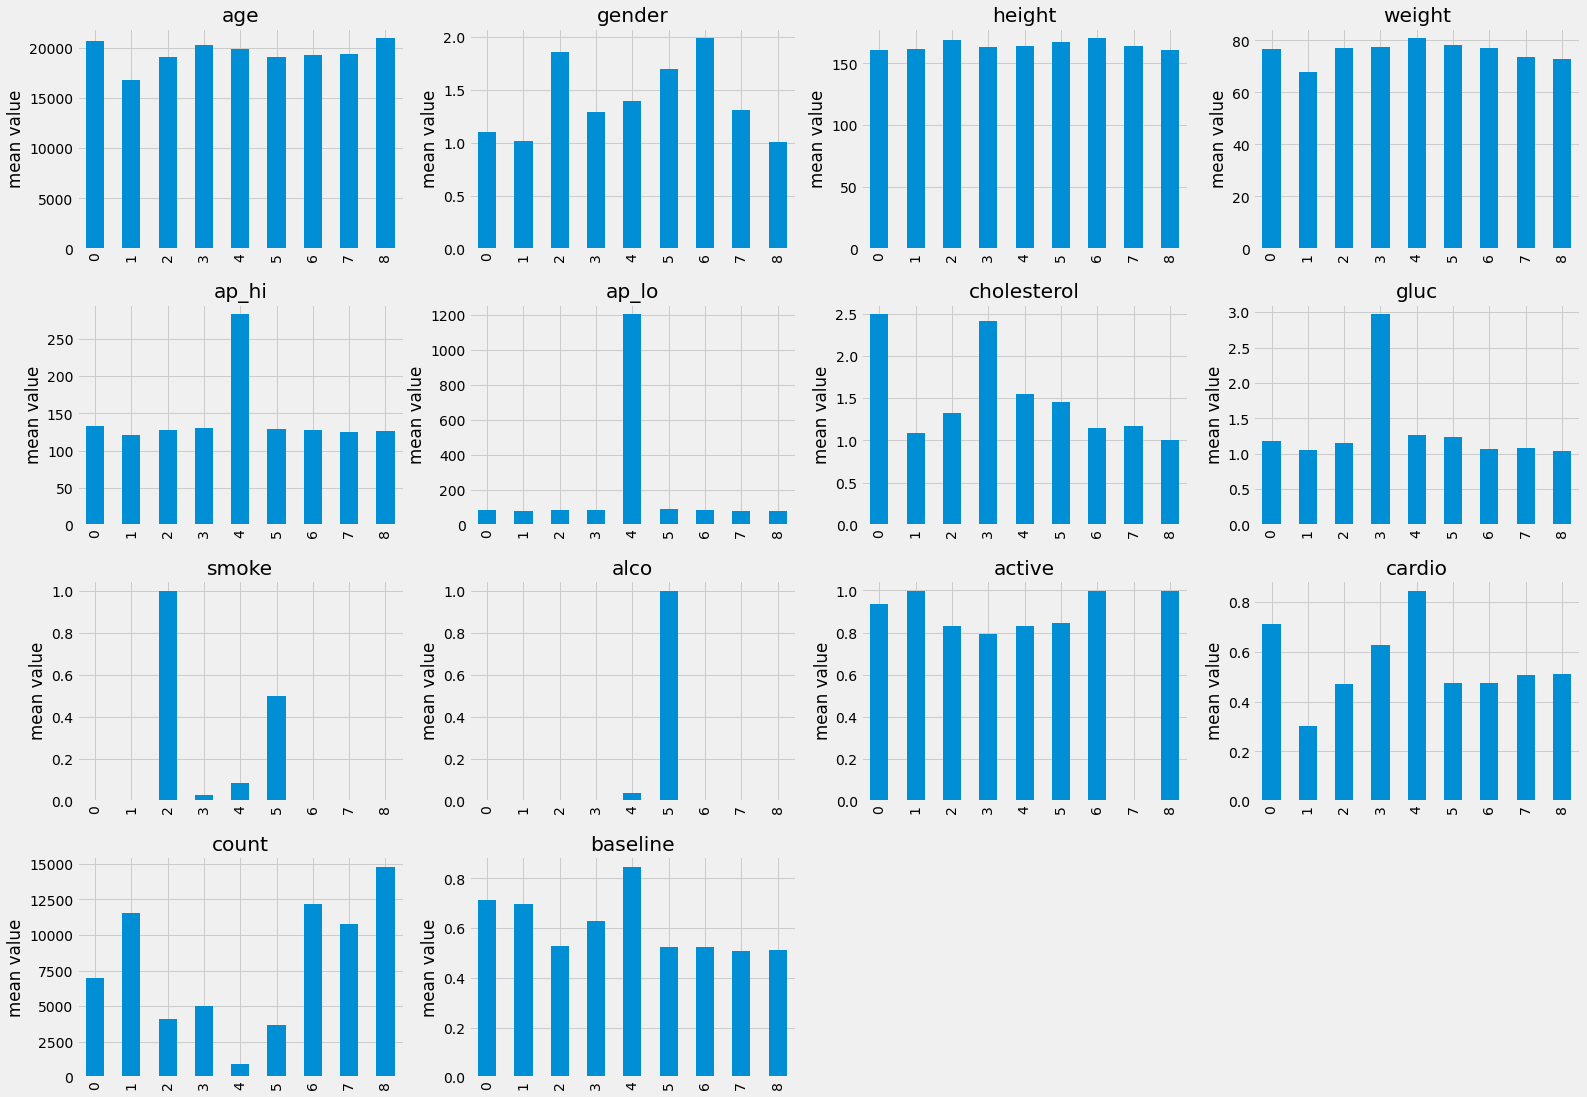

In [15]:
new_map = [7,5,0,4,8,3,2,6,1] # index --> value
# "CLUSTERah" files manually created/numbered to match original cluster

## cluster files
df_infos = []
for i in range(9): # 9 clusters
    path = 'CLUSTERah'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df_info = df.mean().append(pd.Series({"count":len(df)}))
    df_infos.append(df_info[2:]) # id averages are meaningless
#     print(i, df.mean(), len(df), sep="\n")
cluster_summaries = pd.concat(df_infos, axis=1).T
cluster_summaries["baseline"] = pd.concat([cluster_summaries["cardio"], 1-cluster_summaries["cardio"]],axis=1).max(axis=1)

n,m = cluster_summaries.shape

import math
p = math.ceil(math.sqrt(m))
fig, axes = plt.subplots(nrows=p, ncols=p,figsize=(24,18))

plt.subplots_adjust(wspace=0.2, hspace=0.25)

(i,j) = 0,0
for col in cluster_summaries.columns:
    cluster_summaries[col].plot.bar(ax=axes[j//p, j%p])
    axes[j//p, j%p].set_title(col)
    axes[j//p, j%p].set_ylabel("mean value")
#     axes[j//p, j%p].savefig(col)
    j += 1
    
for r in range(j,p**2): # remove extra axis
    axes[r//p, r%p].set_axis_off()

plt.savefig("CLUSTER_sums") # check

In [14]:
cluster_summaries.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count,baseline
0,19400.215385,1.312326,164.301205,73.430565,125.520482,81.078591,1.171362,1.079796,0.000000,0.000000,0.000000,0.509175,10790.0,0.509175
1,19141.376863,1.699810,167.741804,78.135546,129.364129,89.604443,1.451368,1.235979,0.500948,1.000000,0.845299,0.476836,3691.0,0.523164
2,20668.627977,1.103300,160.570732,76.862247,133.351076,83.981062,2.494692,1.180201,0.000574,0.000000,0.936011,0.713486,6970.0,0.713486
3,19856.270474,1.394397,164.149784,80.874784,283.534483,1205.133621,1.545259,1.271552,0.084052,0.039871,0.831897,0.846983,928.0,0.846983
4,20993.613918,1.010685,161.163184,72.735262,126.710962,81.321160,1.000338,1.042199,0.000000,0.000000,0.999594,0.512274,14787.0,0.512274


In [59]:
cluster_summaries.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'count', 'baseline'],
      dtype='object')

In [11]:
import numpy as np
# check size of clusters 

cluster_sizes = np.zeros(opt_n)
for label in labels:
    cluster_sizes[label]+=1

print(cluster_sizes) # size of clusters decreasing [4,7,8,0]

# FUNCTION: cluster_id by size (decreasing) [TODO]

[10790.  3691.  6970.   928. 14787.  5040.  4084. 12158. 11552.]


In [55]:
kmeans.cluster_centers_.shape

(9, 11)

In [64]:
# np.set_printoptions(suppress=True)
new_map = [7,5,0,4,8,3,2,6,1] 
df_centers = pd.DataFrame(kmeans.cluster_centers_,columns=cluster_summaries.columns[:11])
df_centers.reindex(new_map).sort_index()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,20960.0,2.0,165.0,75.0,180.0,90.0,3.0,1.0,0.0,0.0,1.0
1,22113.0,1.0,157.0,93.0,130.0,80.0,3.0,1.0,0.0,0.0,1.0
2,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0
3,23186.0,1.0,169.0,71.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0
4,16608.0,1.0,170.0,68.0,150.0,90.0,3.0,1.0,0.0,0.0,1.0
5,18249.0,1.0,158.5,106.0,135.0,85.0,2.5,1.0,0.0,0.0,1.0
6,23046.0,1.0,158.0,90.0,145.0,85.0,2.0,2.0,0.0,0.0,1.0
7,19764.0,1.0,154.0,50.0,170.0,80.0,3.0,1.0,0.0,0.0,1.0
8,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0


In [61]:
df_centers.reindex(new_map)

NameError: name 'new_map' is not defined

In [18]:
jamie = [[7709,1,166,56,90,50,1,2,0,0,0]]
kmeans.predict(jamie)

array([4])

In [19]:
c0 = [[20228,1,156,85.0,140,90,3,1,0,0,1]]
kmeans.predict(c0)

array([4])

In [25]:
df_clusts = []
for i in range(9): # 9 clusters
    path = 'CLUSTERah'+str(i)
    clust = pd.read_csv(path, delimiter=',').iloc[: , 1:]
    df_clusts.append(clust)

In [43]:
c0 = df_clusts[0].iloc[:10,1:-1]
kmeans.fit_predict(c0)

array([2, 8, 1, 6, 4, 5, 3, 7, 5, 0])

In [46]:
df_clusts[0].iloc[:10,1:-1]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,20228,1,156,85.0,140,90,3,1,0,0,1
1,18857,1,165,64.0,130,70,3,1,0,0,0
2,22113,1,157,93.0,130,80,3,1,0,0,1
3,23046,1,158,90.0,145,85,2,2,0,0,1
4,16608,1,170,68.0,150,90,3,1,0,0,1
5,18291,1,155,105.0,120,80,3,1,0,0,1
6,23186,1,169,71.0,140,90,3,1,0,0,1
7,19764,1,154,50.0,170,80,3,1,0,0,1
8,18207,1,162,107.0,150,90,2,1,0,0,1
9,20960,2,165,75.0,180,90,3,1,0,0,1


Feature selection: ANOVA F-test

Some ideas:
- Establish a baseline performance with all features
- Try separate feature selection method for each input type
- Try wrapper method (e.g. RFE) agnostic to input type

In [ ]:
# visualize 
# FIND two dimensions (features) to visualize [TODO]
# **most distinct/different between clusters (scientific way)

# PLOT [TODO]

# test: age on ap_lo (blood pressure)

In [ ]:
# pick three largest clusters (most data points) out of optimal sorting to train models on + general model
# Note: may only be working on subset of data

# separate top clusters into separate data frames [TODO]
## interpret clusters [TODO] - feature summaries for each

In [16]:
# Save model

import pickle

outputPath = "../Final Models/KmeansAH.pkl"

# Write model to file
pickle.dump(kmeans, open(outputPath, 'wb'))

Models to try for binary classification
- penalized logistic regression
    - L1-norm ("lasso"), L2-norm ("ridge"), a combination of the two ("elastic"), or a penalty associated to groups of variables ("group lasso").
- random forest